# ipynb-файл:
- Создать несколько типичных запросов к БД, на которых можно было бы увидеть основные возможности выборки данных, желательно с использованием NumPy, Pandas, Matplotlib и т.п..
Например:
- статистика ссылок по доменам
- поиск дубликатов ссылок

In [3]:
# Создаем пример БД
import os
import sqlite3
from prettytable import from_db_cursor

TEMP_DIR = "temp"
if not os.path.exists(TEMP_DIR):
    os.mkdir(TEMP_DIR)

db_name = os.path.join(TEMP_DIR, 'temp_SQLite.db')

db = sqlite3.connect(db_name)
cur = db.cursor()

# Пытаемся создать БД
try:
    cur.execute("CREATE TABLE data (id integer primary key AUTOINCREMENT NOT NULL, filename varchar(100), url_domain varchar(100))")
    db.commit()
except:
    pass

# Пытаемся заполнить таблицу БД
try:
    filenames = "test_file_1.txt, test_file_2.txt, test_file_3.txt, test_file_1.txt, test_file_1.txt".split(', ')
    cur.executemany("INSERT INTO data (filename) VALUES (?)", [(i,) for i in filenames])
    cur.execute('UPDATE data SET url_domain = "vk.com" WHERE id = 1')
    cur.execute('UPDATE data SET url_domain = "D:\\" WHERE id = 2')
    cur.execute('UPDATE data SET url_domain = "github.com" WHERE id = 3')
    cur.execute('UPDATE data SET url_domain = "github.com" WHERE id = 4')
    cur.execute('UPDATE data SET url_domain = "github.com" WHERE id = 5')
except Exception as ex:
    print(ex)

# Выводим данные БД
cur.execute("SELECT * FROM data")
from_db_cursor(cur)

id,filename,url_domain
1,test_file_1.txt,vk.com
2,test_file_2.txt,D:\
3,test_file_3.txt,github.com
4,test_file_1.txt,github.com
5,test_file_1.txt,github.com


In [4]:
# Статистика ссылок по доменам
import numpy
import pandas
import matplotlib

df = pandas.read_sql_query("SELECT * FROM data", db)
df.head()

,id,filename,url_domain
0,1,test_file_1.txt,vk.com
1,2,test_file_2.txt,D:\
2,3,test_file_3.txt,github.com
3,4,test_file_1.txt,github.com
4,5,test_file_1.txt,github.com


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5 non-null      int64 
 1   filename    5 non-null      object
 2   url_domain  5 non-null      object
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


In [6]:
print(df.count())

id            5
filename      5
url_domain    5
dtype: int64


In [7]:
df.url_domain.value_counts()

github.com    3
vk.com        1
D:\           1
Name: url_domain, dtype: int64

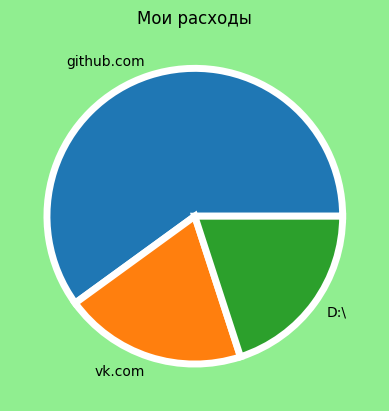

In [8]:
import matplotlib.pyplot as plt

dict_df = dict(df.url_domain.value_counts())

labels = dict_df.keys()
values = dict_df.values()

fig, ax = plt.subplots()
fig.set_facecolor('lightgreen')
ax.set_title('Мои расходы')
ax.pie(values, labels=labels, wedgeprops={"linewidth": 5, "edgecolor":'white'})
plt.show()

In [9]:
# Поиск дубликатов ссылок
df[df.url_domain.duplicated()]


,id,filename,url_domain
3,4,test_file_1.txt,github.com
4,5,test_file_1.txt,github.com


In [10]:
db.close()